## Google E-commerce Customer Segementation

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.rcParams["figure.figsize"] = (20, 10)
random.seed(42)

In [3]:
cs=pd.read_csv('/Users/anqichen/Downloads/ecommerce.csv')
cs['date']=pd.to_datetime(cs['date'],format='%Y%m%d')
cs.head()

,date,Revenue,fullVisitorId
0,2017-06-28,73.46,8819842572136871109
1,2016-10-02,63.95,4996510286543496531
2,2017-06-28,41.99,8481119688738735207
3,2016-12-15,49.99,834453370110165389
4,2017-03-08,19.99,6095240958469403590


In [4]:
cs.head()

,date,Revenue,fullVisitorId
0,2017-06-28,73.46,8819842572136871109
1,2016-10-02,63.95,4996510286543496531
2,2017-06-28,41.99,8481119688738735207
3,2016-12-15,49.99,834453370110165389
4,2017-03-08,19.99,6095240958469403590


In [5]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           11515 non-null  datetime64[ns]
 1   Revenue        11515 non-null  float64       
 2   fullVisitorId  11515 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 270.0 KB


In [6]:
# create recency
date_recency=cs.groupby(cs['fullVisitorId'],as_index=False)['date'].max()
date_recency.columns=['fullVisitorId','date']
date_recency['end_date']='20170801'
date_recency['end_date']=pd.to_datetime(date_recency['end_date'],format='%Y%m%d')
date_recency['recency']=(date_recency['end_date']-date_recency['date']).astype('timedelta64[D]').astype(int)
date_recency.head()

,fullVisitorId,date,end_date,recency
0,213131142648941,2017-04-28,2017-08-01,95
1,435324061339869,2016-10-20,2017-08-01,285
2,562678147042735,2017-04-24,2017-08-01,99
3,585708896049892,2016-12-21,2017-08-01,223
4,670722016498267,2017-07-10,2017-08-01,22


In [7]:
# create frequency
frequency=cs.groupby(cs['fullVisitorId'],as_index=False)['Revenue'].count()
frequency.columns=['fullVisitorId','frequency']
frequency.head()

,fullVisitorId,frequency
0,213131142648941,1
1,435324061339869,1
2,562678147042735,1
3,585708896049892,1
4,670722016498267,1


In [8]:
# create monetary
Monetary=cs.groupby(cs['fullVisitorId'],as_index=False)['Revenue'].sum()
Monetary.columns=['fullVisitorId','monetary']
Monetary.head()

,fullVisitorId,monetary
0,213131142648941,33.59
1,435324061339869,44.79
2,562678147042735,95.70
3,585708896049892,43.97
4,670722016498267,37.98


In [9]:
# merge three tables
cs_fr=frequency.merge(date_recency,on='fullVisitorId').drop(columns=['end_date','date'])
rfm=Monetary.merge(cs_fr,on='fullVisitorId')
rfm.head()

,fullVisitorId,monetary,frequency,recency
0,213131142648941,33.59,1,95
1,435324061339869,44.79,1,285
2,562678147042735,95.70,1,99
3,585708896049892,43.97,1,223
4,670722016498267,37.98,1,22


/Users/anqichen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


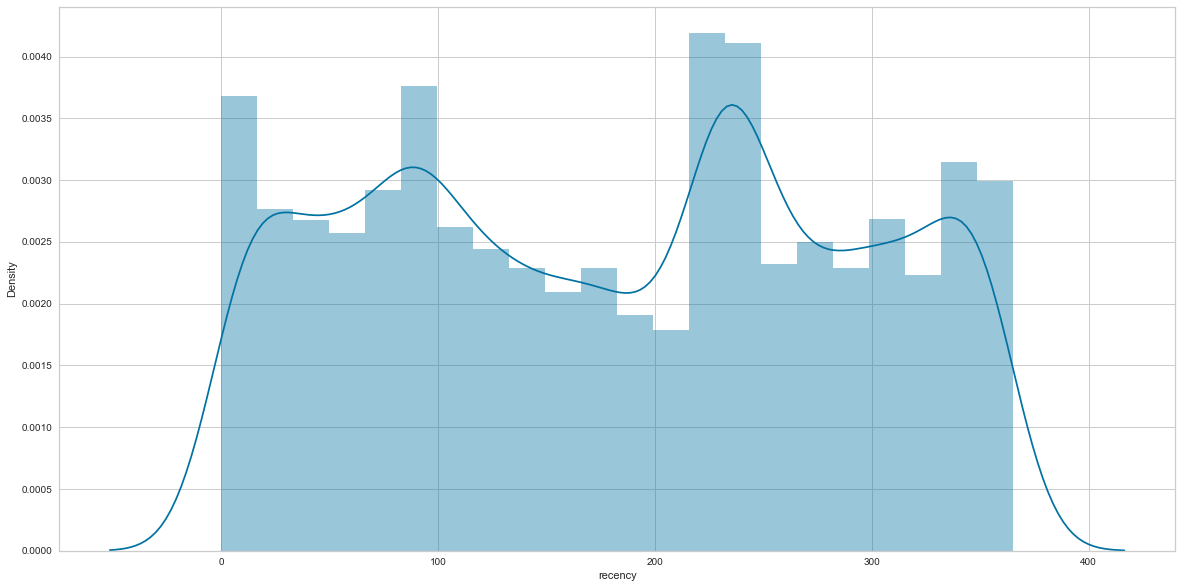

In [10]:
x = rfm['recency']
ax = sns.distplot(x)

/Users/anqichen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


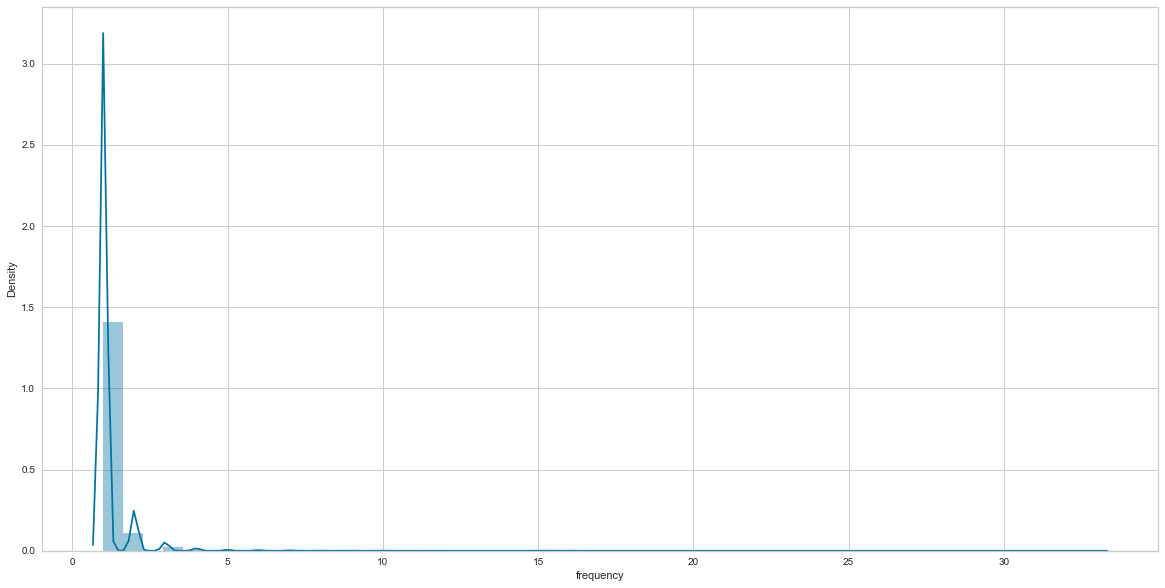

In [11]:
x = rfm['frequency']
ax = sns.distplot(x)

/Users/anqichen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


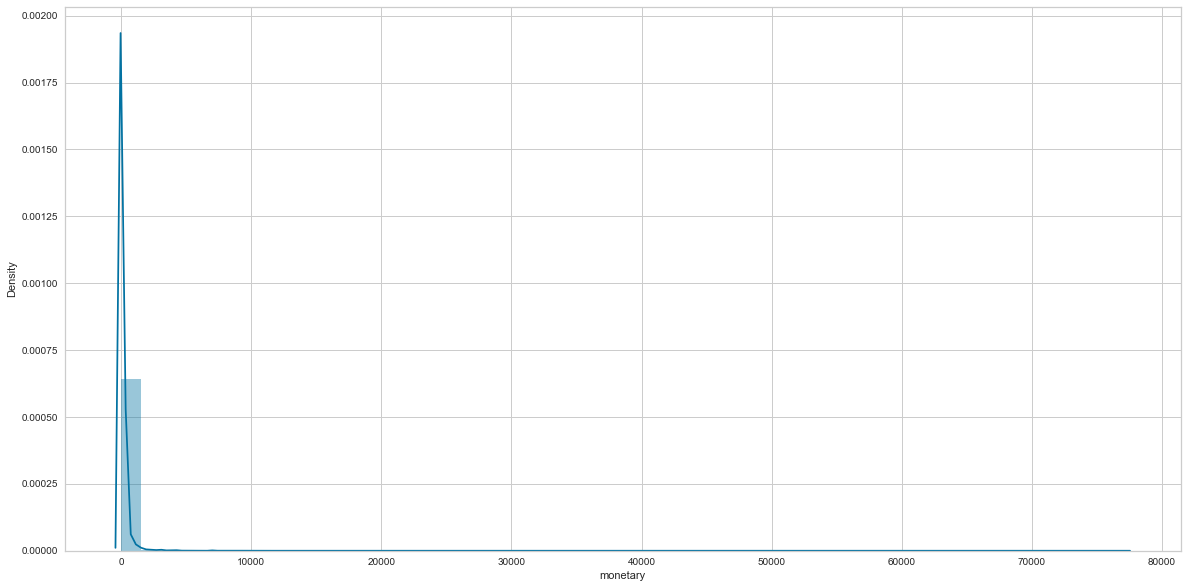

In [12]:
x = rfm['monetary']
ax = sns.distplot(x)

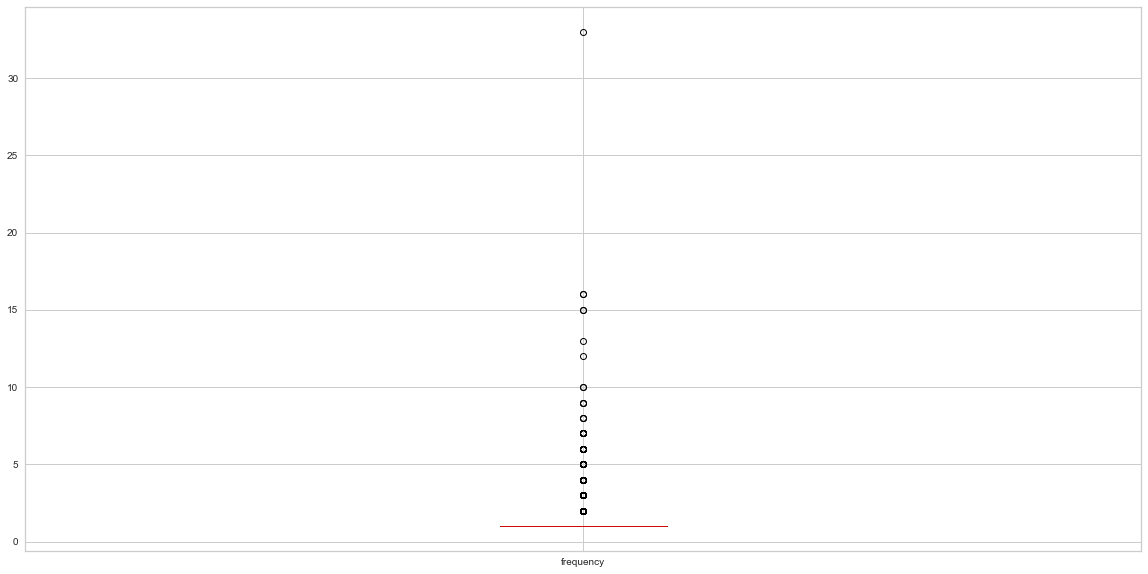

In [13]:
x = rfm['frequency'].plot(kind='box')

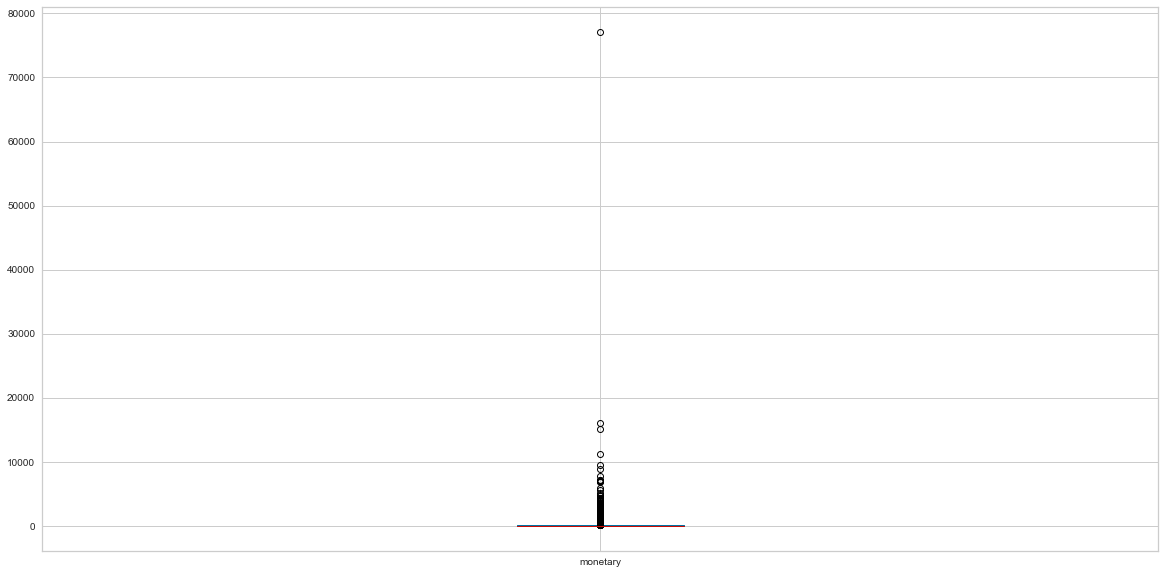

In [14]:
x = rfm['monetary'].plot(kind='box')

In [15]:
IQR1=rfm['monetary'].quantile(.75)-rfm['monetary'].quantile(.25)
MAX1=rfm['monetary'].quantile(.75)+ 1.5* IQR1
print(MAX1)

234.43125


In [19]:
m=rfm[rfm['monetary']<234]
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 9995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fullVisitorId  8807 non-null   uint64 
 1   monetary       8807 non-null   float64
 2   frequency      8807 non-null   int64  
 3   recency        8807 non-null   int64  
dtypes: float64(1), int64(2), uint64(1)
memory usage: 344.0 KB


In [20]:
rfm['monetary'].median()

48.845

In [21]:
rfm['monetary'].mean()

154.06875150059545

In [22]:
rfm['monetary'].std()

903.3364748329205

In [23]:
print(rfm['monetary'].mean()+3*rfm['monetary'].std())

2864.078175999357


In [24]:
mo=rfm[rfm['monetary']<=(rfm['monetary'].mean()+3*rfm['monetary'].std())]
mo.info()
rfm=mo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9941 entries, 0 to 9995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fullVisitorId  9941 non-null   uint64 
 1   monetary       9941 non-null   float64
 2   frequency      9941 non-null   int64  
 3   recency        9941 non-null   int64  
dtypes: float64(1), int64(2), uint64(1)
memory usage: 388.3 KB


In [25]:
IQR2=rfm['frequency'].quantile(.75)-rfm['frequency'].quantile(.25)
MAX2=rfm['frequency'].quantile(.75)+ 1.5* IQR2
print(MAX2)

1.0


In [26]:
rfm['frequency'].mean()

1.1306709586560708

In [27]:
rfm['frequency'].std()

0.5705074186713921

In [28]:
f=rfm[rfm['frequency']<=(rfm['frequency'].mean()+3*rfm['frequency'].std())]
f.info()
rfm=f

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 0 to 9995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fullVisitorId  9722 non-null   uint64 
 1   monetary       9722 non-null   float64
 2   frequency      9722 non-null   int64  
 3   recency        9722 non-null   int64  
dtypes: float64(1), int64(2), uint64(1)
memory usage: 379.8 KB


<AxesSubplot:>

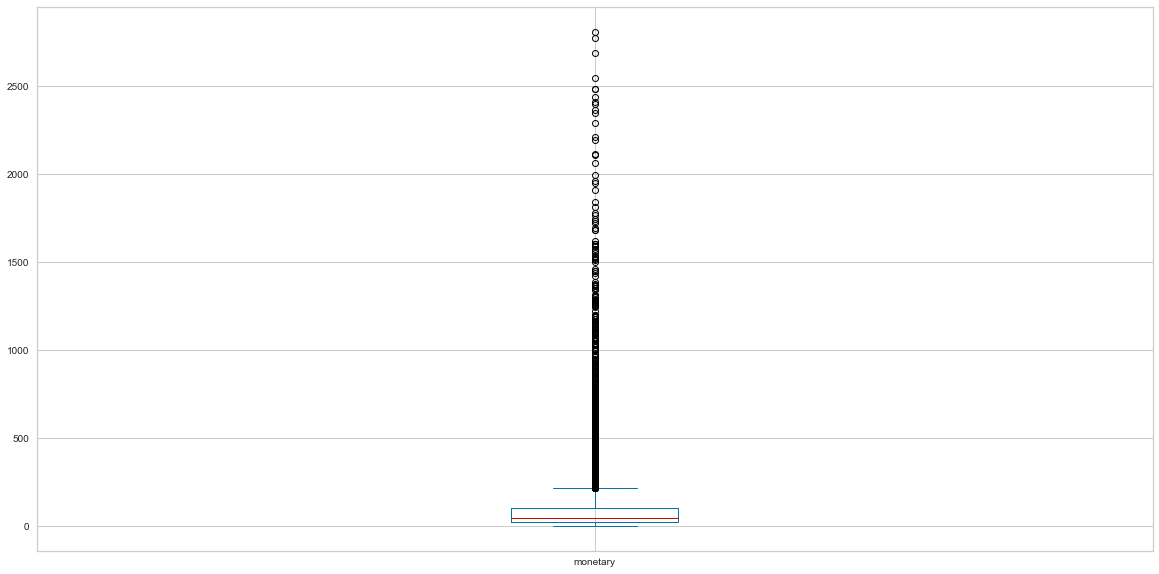

In [29]:
rfm['monetary'].plot(kind='box')

In [30]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [31]:
rfm_a=rfm[['recency','frequency','monetary']]
scaler = StandardScaler()
x_scaled=scaler.fit(rfm_a)
x_scaled = scaler.fit_transform(rfm_a)
x_scaled

array([[-0.79437041, -0.28004437, -0.36550518],
       [ 0.96213609, -0.28004437, -0.31166658],
       [-0.75739132, -0.28004437, -0.06694132],
       ...,
       [ 0.50914231, -0.28004437, -0.37141781],
       [ 1.70171778, -0.28004437, -0.0597308 ],
       [ 0.71252727, -0.28004437, -0.23864799]])

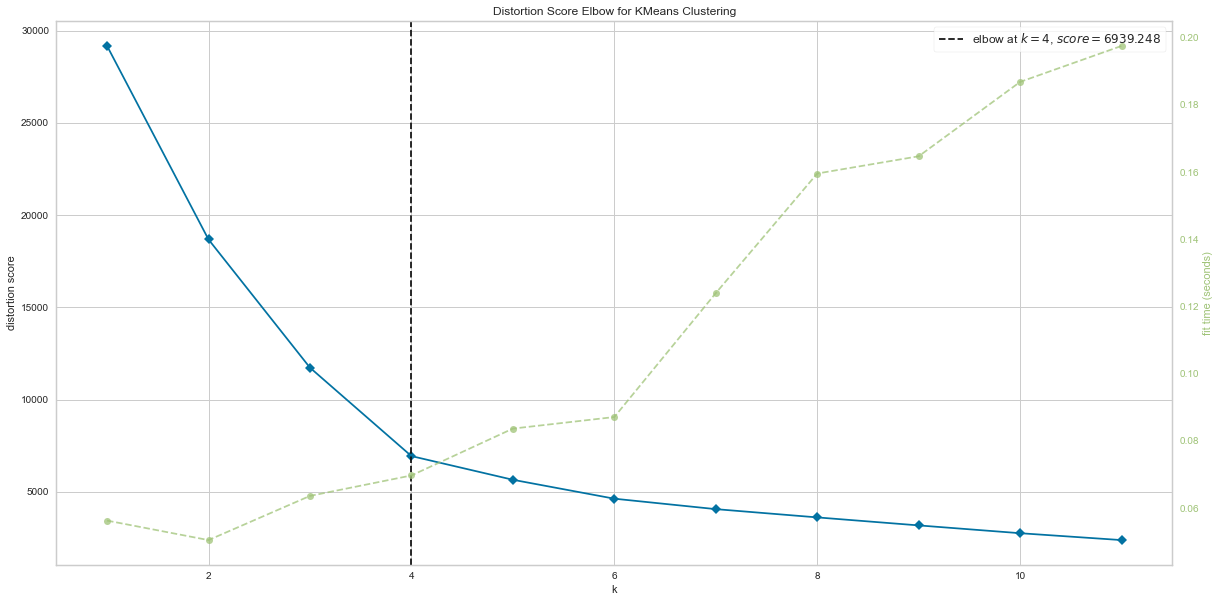

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

model = KMeans()
visualizer = KElbowVisualizer (model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()

[3 1 3 ... 1 1 1]
 Cluster centers are as follows
[[-9.00890379e-01 -2.80044367e-01 -1.71379929e-01]
 [ 8.61755341e-01 -2.80044367e-01 -1.48491912e-01]
 [-1.29752067e-01  3.57086276e+00  4.53218014e-01]
 [ 3.15385524e-03  6.96241946e-01  5.24459859e+00]]


,recency,frequency,monetary
cluster_predict,,,
0,4282,4282,4282
1,4574,4574,4574
2,653,653,653
3,213,213,213


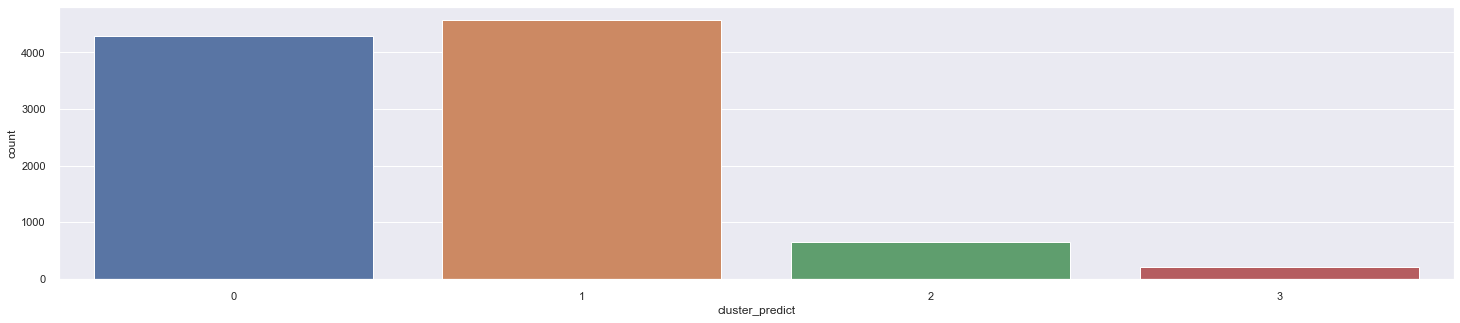

In [35]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm_a)
clusters_scaled = rfm_a.copy()
clusters_scaled['cluster_predict']=kmeans_scaled.fit_predict(x_scaled)

print(identified_clusters)
print(" Cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_predict", data=clusters_scaled)
clusters_scaled.groupby(['cluster_predict']).count()

In [56]:
cs_mean=clusters_scaled.groupby(['cluster_predict']).mean()
cs_mean=cs_mean.rename_axis('k_cluster').reset_index()
cs_mean

,k_cluster,recency,frequency,monetary
0,0,83.477814,1.000000,73.973720
1,1,274.141889,1.000000,78.735096
2,2,166.891271,2.000000,203.908331
3,3,181.267606,1.253521,1200.655399


In [51]:
table=clusters_scaled.groupby(['cluster_predict']).count()
cs_count=table.drop(columns=['frequency','monetary']).rename_axis('k_cluster').reset_index()
cs_count=cs_count.rename(columns={'recency':'count'})
cs_count

,k_cluster,count
0,0,4282
1,1,4574
2,2,653
3,3,213


In [61]:
model=cs_count.merge(cs_mean,on='k_cluster')
model
model.to_csv('/Users/anqichen/Downloads/model.csv')

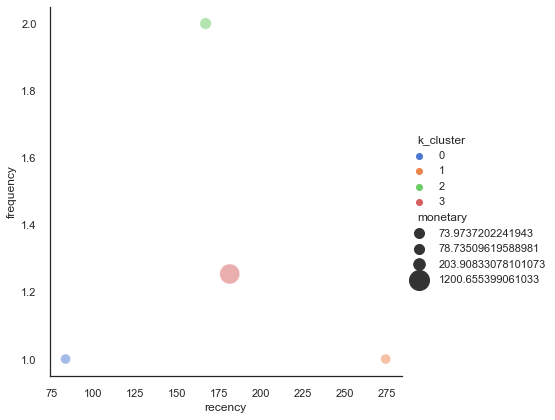

In [58]:
sns.set_theme(style="white")

sns.relplot(x="recency", y="frequency",hue="k_cluster", size="monetary",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=model)